In [1]:
import torch 
from torch.utils.data import Dataset, DataLoader 
import random
import torch.autograd as autograd         
from torch import Tensor                 
import torch.nn as nn                     
import torch.nn.functional as F           
import torch.optim as optim               

import torchvision
from torchvision.utils import save_image
import torchvision.transforms as transforms  
import numpy as np  
import matplotlib.pyplot as plt        

In [2]:
import Models

In [3]:
import train 
import test
from train import *
from test import *

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [5]:
data_dir = 'dataset'

In [6]:
train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

In [7]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

In [8]:
m=len(train_dataset)

#random_split randomly split a dataset into non-overlapping new datasets of given lengths
#train (55,000 images), val split (5,000 images)
train_data, val_data = torch.utils.data.random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])

batch_size=256

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

tensor(4)


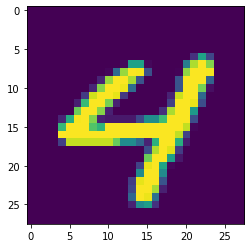

In [9]:
images, labels = iter(train_loader).next()
img = images[0][0].numpy()
print(labels[0])
plt.imshow(img)

In [10]:
# model = Autoencoder(latent_space=8, mode='decoder').to(device)

In [11]:
model2 = Models.AutoEncoderClassifier(latent_space=8).to(device)
print(model2)

AutoEncoderClassifier(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=784, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=16, bias=True)
      (5): ReLU()
      (6): Linear(in_features=16, out_features=8, bias=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): Linear(in_features=8, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): ReLU()
      (6): Linear(in_features=128, out_features=784, bias=True)
      (7): Sigmoid()
    )
  )
  (clf): Classifier(
    (classifier): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in

In [12]:
for param in model2.named_parameters():
  print(param)

('encoder.encoder.0.weight', Parameter containing:
tensor([[ 0.0142,  0.0087, -0.0357,  ..., -0.0263,  0.0060,  0.0039],
        [ 0.0103,  0.0356,  0.0210,  ..., -0.0140,  0.0240,  0.0322],
        [-0.0054,  0.0077,  0.0088,  ...,  0.0332,  0.0337, -0.0311],
        ...,
        [ 0.0203,  0.0126, -0.0319,  ...,  0.0258, -0.0238, -0.0239],
        [ 0.0003,  0.0206, -0.0031,  ...,  0.0236,  0.0008, -0.0047],
        [-0.0162, -0.0195,  0.0143,  ...,  0.0134,  0.0330,  0.0240]],
       requires_grad=True))
('encoder.encoder.0.bias', Parameter containing:
tensor([-0.0084, -0.0113, -0.0170, -0.0219,  0.0060,  0.0169, -0.0223, -0.0273,
         0.0223, -0.0299,  0.0313,  0.0169, -0.0162, -0.0282, -0.0335,  0.0201,
        -0.0035, -0.0142, -0.0044,  0.0101, -0.0175,  0.0226, -0.0234, -0.0144,
        -0.0019,  0.0157, -0.0356, -0.0153, -0.0177,  0.0064, -0.0315,  0.0284,
        -0.0048,  0.0353,  0.0223,  0.0347, -0.0211, -0.0033,  0.0098, -0.0297,
        -0.0246,  0.0313,  0.0325,  0.

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-3)

In [14]:
import os

In [15]:
os.makedirs('Images3')

FileExistsError: ignored

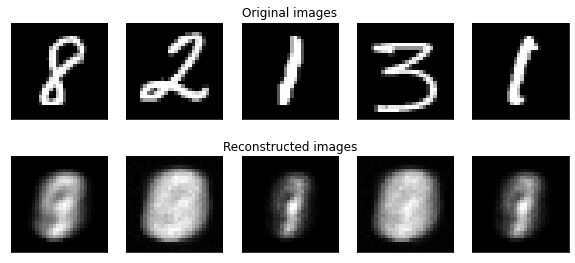

epoch [1/100], 	Training Loss:21.5823 	Validation Loss:15.4415
epoch [2/100], 	Training Loss:14.4696 	Validation Loss:13.8313
epoch [3/100], 	Training Loss:12.8703 	Validation Loss:12.1802
epoch [4/100], 	Training Loss:11.2557 	Validation Loss:10.6405
epoch [5/100], 	Training Loss:10.2494 	Validation Loss:9.9425
epoch [6/100], 	Training Loss:9.5701 	Validation Loss:9.2676
epoch [7/100], 	Training Loss:9.0465 	Validation Loss:8.9102
epoch [8/100], 	Training Loss:8.7271 	Validation Loss:8.6099
epoch [9/100], 	Training Loss:8.4261 	Validation Loss:8.2512
epoch [10/100], 	Training Loss:8.0585 	Validation Loss:7.9137


In [16]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):
  train_loss = train_step_per_epoch(model2, train_loader, device, criterion, optimizer, epoch, 'Images2', plot_train=True)
  val_loss = test_step_per_epoch(model2, valid_loader, device, criterion)
  print('epoch [{}/{}], \tTraining Loss:{:.4f} \tValidation Loss:{:.4f}'.format(epoch + 1, 100, train_loss, val_loss))

In [17]:
for param in model2.named_parameters():
  print(param)

('encoder.encoder.0.weight', Parameter containing:
tensor([[ 0.0142,  0.0087, -0.0357,  ..., -0.0263,  0.0060,  0.0039],
        [ 0.0103,  0.0356,  0.0210,  ..., -0.0140,  0.0240,  0.0322],
        [-0.0054,  0.0077,  0.0088,  ...,  0.0332,  0.0337, -0.0311],
        ...,
        [ 0.0203,  0.0126, -0.0319,  ...,  0.0258, -0.0238, -0.0239],
        [ 0.0003,  0.0206, -0.0031,  ...,  0.0236,  0.0008, -0.0047],
        [-0.0162, -0.0195,  0.0143,  ...,  0.0134,  0.0330,  0.0240]],
       requires_grad=True))
('encoder.encoder.0.bias', Parameter containing:
tensor([-0.0626,  0.4047,  0.0165, -0.0318, -0.0063,  0.1092,  0.0466, -0.0346,
         0.1345, -0.0389,  0.2244,  0.0056, -0.0250,  0.0489, -0.0942,  0.0906,
         0.0500,  0.2363, -0.0111,  0.0572, -0.0281,  0.0026,  0.2367,  0.1138,
        -0.0110,  0.1233, -0.0459, -0.0226, -0.0305, -0.0658,  0.2023,  0.0149,
         0.1647,  0.0255,  0.0140,  0.1280,  0.0356,  0.0774,  0.0726, -0.0162,
         0.2012,  0.0225,  0.2585,  0.

In [18]:
criterion = nn.NLLLoss()

In [19]:
model2.TurnOffEncoder()

In [20]:
optimizer = optim.Adam(model2.parameters(), lr=1e-3)

In [22]:

train_loss_arr = []
val_loss_arr=[]
for epoch in range(50):
    
    train_loss = 0
    val_loss = 0
    
    model2.train()
    
    for image, label in train_loader:
        image = image.view(image.size(0), -1).to(device)
        label = label.to(device)
        #forward
        out = model2.classify(image)
        loss = criterion(out, label)
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*image.size(0)
        
    model2.eval()
    
    for image, label in valid_loader:
        image = image.view(image.size(0), -1).to(device)
        label = label.to(device)
        out = model2.classify(image)
        loss = criterion(out, label)
        
        val_loss += loss.item()*image.size(0)
    
    val_loss = val_loss/len(valid_loader)    
    train_loss = train_loss/len(train_loader)
    
    val_loss_arr.append(val_loss)
    train_loss_arr.append(train_loss)
    
    print('epoch [{}/{}], \tTraining Loss:{:.4f} \tValidation Loss:{:.4f}'.format(epoch + 1, 50, train_loss, val_loss))
    
    # if val_loss < val_loss_min:
    #     print('Validation loss has decreased ({:.4f}-->{:.4f}). Model saved...'.format(val_loss_min, val_loss))
    #     torch.save(model.state_dict(), 'autoencoder_V2.pt')
    #     val_loss_min = val_loss

epoch [1/50], 	Training Loss:164.4512 	Validation Loss:150.4447
epoch [2/50], 	Training Loss:143.6207 	Validation Loss:136.1451
epoch [3/50], 	Training Loss:132.9294 	Validation Loss:129.6306
epoch [4/50], 	Training Loss:125.4032 	Validation Loss:125.0170
epoch [5/50], 	Training Loss:121.8939 	Validation Loss:121.5179
epoch [6/50], 	Training Loss:118.6382 	Validation Loss:121.1622
epoch [7/50], 	Training Loss:116.7166 	Validation Loss:117.5351
epoch [8/50], 	Training Loss:115.1873 	Validation Loss:114.6048
epoch [9/50], 	Training Loss:113.4442 	Validation Loss:112.7980
epoch [10/50], 	Training Loss:112.0933 	Validation Loss:112.2728


KeyboardInterrupt: ignored

In [25]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval() # prep model for evaluation
with torch.no_grad():
    for image, target in test_loader:
        image = image.view(image.size(0), -1).to(device)
        target = target.to(device)
        output = model2.classify(image)
        loss = criterion(output, target)

        test_loss += loss.item()*image.size(0)

        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(len(target)):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.442192

Test Accuracy of     0: 95% (937/980)
Test Accuracy of     1: 97% (1112/1135)
Test Accuracy of     2: 89% (928/1032)
Test Accuracy of     3: 84% (856/1010)
Test Accuracy of     4: 82% (807/982)
Test Accuracy of     5: 74% (666/892)
Test Accuracy of     6: 90% (865/958)
Test Accuracy of     7: 87% (904/1028)
Test Accuracy of     8: 82% (806/974)
Test Accuracy of     9: 74% (754/1009)

Test Accuracy (Overall): 86% (8635/10000)


In [26]:
for param in model2.named_parameters():
  print(param)

('encoder.encoder.0.weight', Parameter containing:
tensor([[ 0.0142,  0.0087, -0.0357,  ..., -0.0263,  0.0060,  0.0039],
        [ 0.0103,  0.0356,  0.0210,  ..., -0.0140,  0.0240,  0.0322],
        [-0.0054,  0.0077,  0.0088,  ...,  0.0332,  0.0337, -0.0311],
        ...,
        [ 0.0203,  0.0126, -0.0319,  ...,  0.0258, -0.0238, -0.0239],
        [ 0.0003,  0.0206, -0.0031,  ...,  0.0236,  0.0008, -0.0047],
        [-0.0162, -0.0195,  0.0143,  ...,  0.0134,  0.0330,  0.0240]]))
('encoder.encoder.0.bias', Parameter containing:
tensor([-0.0626,  0.4047,  0.0165, -0.0318, -0.0063,  0.1092,  0.0466, -0.0346,
         0.1345, -0.0389,  0.2244,  0.0056, -0.0250,  0.0489, -0.0942,  0.0906,
         0.0500,  0.2363, -0.0111,  0.0572, -0.0281,  0.0026,  0.2367,  0.1138,
        -0.0110,  0.1233, -0.0459, -0.0226, -0.0305, -0.0658,  0.2023,  0.0149,
         0.1647,  0.0255,  0.0140,  0.1280,  0.0356,  0.0774,  0.0726, -0.0162,
         0.2012,  0.0225,  0.2585,  0.0235, -0.0290,  0.0776,  0.

In [75]:
for param in model3.named_parameters():
  print(param)

('encoder.encoder.0.weight', Parameter containing:
tensor([[ 3.2411e-02, -3.2762e-02,  2.6795e-02,  ...,  2.7951e-02,
          7.7435e-05,  2.1013e-02],
        [ 2.6341e-02,  2.0946e-02, -4.3794e-03,  ..., -2.7978e-02,
         -3.0247e-02, -2.8799e-02],
        [ 3.6207e-03, -1.1272e-02, -1.6410e-02,  ...,  3.1289e-02,
         -1.5675e-02, -2.7952e-02],
        ...,
        [ 1.3151e-02,  1.7483e-02, -2.0752e-02,  ...,  7.6169e-03,
         -9.5549e-03,  1.3336e-02],
        [ 6.5785e-03, -1.6895e-02, -2.6035e-02,  ...,  1.5044e-02,
         -1.9176e-02, -3.3738e-02],
        [-2.8310e-02,  6.3773e-03, -3.0421e-04,  ..., -2.5119e-02,
         -6.2974e-04, -2.0374e-02]], requires_grad=True))
('encoder.encoder.0.bias', Parameter containing:
tensor([-0.0262,  0.0281,  0.0184,  0.0139,  0.0242, -0.0137, -0.0067, -0.0322,
        -0.0218,  0.0079,  0.0260,  0.0105,  0.0320, -0.0328, -0.0320,  0.0268,
         0.0121, -0.0013, -0.0222,  0.0302, -0.0154, -0.0069, -0.0263,  0.0254,
       

In [79]:
model3.state_dict()

OrderedDict([('encoder.encoder.0.weight',
              tensor([[ 3.2411e-02, -3.2762e-02,  2.6795e-02,  ...,  2.7951e-02,
                        7.7435e-05,  2.1013e-02],
                      [ 2.6341e-02,  2.0946e-02, -4.3794e-03,  ..., -2.7978e-02,
                       -3.0247e-02, -2.8799e-02],
                      [ 3.6207e-03, -1.1272e-02, -1.6410e-02,  ...,  3.1289e-02,
                       -1.5675e-02, -2.7952e-02],
                      ...,
                      [ 1.3151e-02,  1.7483e-02, -2.0752e-02,  ...,  7.6169e-03,
                       -9.5549e-03,  1.3336e-02],
                      [ 6.5785e-03, -1.6895e-02, -2.6035e-02,  ...,  1.5044e-02,
                       -1.9176e-02, -3.3738e-02],
                      [-2.8310e-02,  6.3773e-03, -3.0421e-04,  ..., -2.5119e-02,
                       -6.2974e-04, -2.0374e-02]])),
             ('encoder.encoder.0.bias',
              tensor([-0.0262,  0.0281,  0.0184,  0.0139,  0.0242, -0.0137, -0.0067, -0.0322,
        

In [81]:
class Autoencoder(nn.Module):
    def __init__(self, latent_space, mode):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, latent_space)
        )

        self.decoder = nn.Sequential(
             nn.Linear(latent_space, 16),
             nn.ReLU(),
             nn.Linear(16, 64), 
             nn.ReLU(),
             nn.Linear(64, 128),
             nn.ReLU(),
             nn.Linear(128, 784),
             nn.Sigmoid()
        )

        self.classifier = nn.Sequential(
            nn.Linear(latent_space, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.LogSoftmax(dim=1)
        )

        self.mode = mode

    def forward(self, x):
        encoded = self.encoder(x)
        if self.mode == 'decoder':
            out = self.decoder(encoded)
        elif self.mode == 'classifier':
            out = self.classifier(encoded)
        else:
            print('Choose the mode of NN')
        
        return out